In [1]:
#biblioteca padas para Analise de dados
import pandas as pd

#biblioteca baixo nivel utlizada para otimizar codigo
import numpy as np

#biblioteca basica para apresentacao dados e criação de graficos
import matplotlib.pyplot as plt

#trabalha acima da matplotlib
import seaborn as sns

#from mpl_toolkits import mplot3d

#from mpl_toolkits.basemap import Basemap

#import utm


from sklearn.cluster import KMeans

from sklearn import preprocessing

In [2]:
#carregamentos do arquivo CSV
dadosMina = pd.read_csv('data.csv',delimiter=';',encoding='ISO-8859-1')

In [3]:
dadosMina.columns

Index(['Data', 'Hora', 'Latitude', 'Longitude', 'Altitude', 'Ocorrencia',
       'KmHora', 'RPM', 'Acelerador', 'Odometro', 'Temperatura',
       'TaxaCombustivel', 'Combustivel', 'Velocidade', 'Embreagem', 'Freio',
       'HorimetroT'],
      dtype='object')

In [4]:
dadosMina = dadosMina.loc[:,['Data','Hora','Altitude','Ocorrencia','KmHora','RPM','Acelerador','Odometro','Temperatura','Combustivel','Velocidade','HorimetroT']]

In [5]:
dadosAltiRpmVelo = dadosMina.loc[:,['Altitude','RPM','Velocidade','Combustivel']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x2506B130>,
      dtype=object)

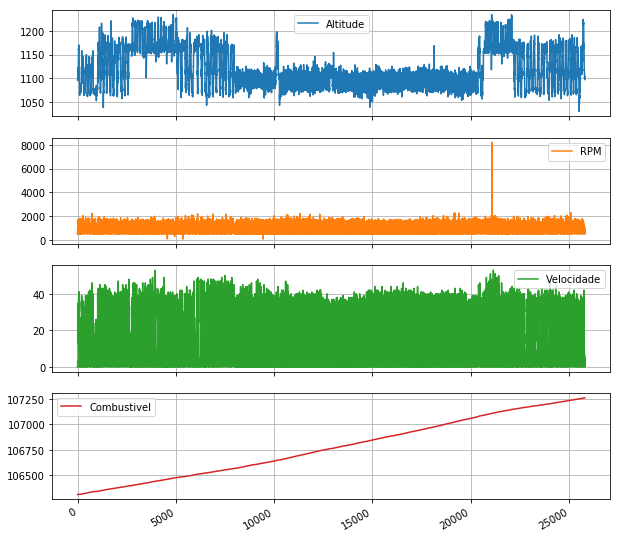

In [6]:
dadosAltiRpmVelo.plot(subplots=True,figsize=(10,10),grid=True)

Altitude          AxesSubplot(0.125,0.125;0.168478x0.755)
RPM            AxesSubplot(0.327174,0.125;0.168478x0.755)
Velocidade     AxesSubplot(0.529348,0.125;0.168478x0.755)
Combustivel    AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

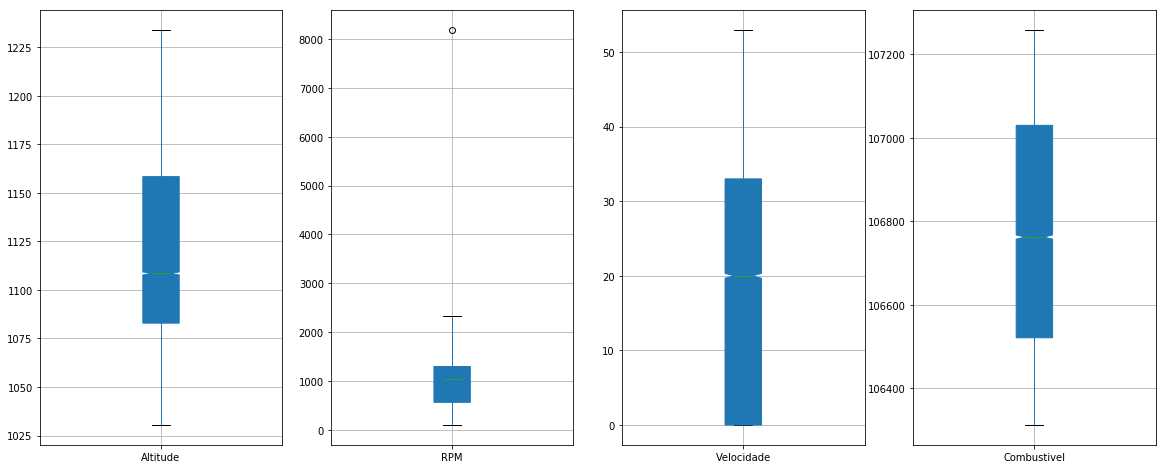

In [7]:
dadosAltiRpmVelo.plot(subplots=True,kind="box",figsize=(20,8), notch=True,vert=True,patch_artist=True, grid=True)

In [8]:
'''
2018-01-03

12:48:50
13:17:50
'''        
mask2 = (dadosMina['Hora'] > '12:48:50') & (dadosMina['Hora'] <= '13:17:50') & (dadosMina['Data']=='01/03/2018')
dadosMinaUmaViagem=dadosMina.loc[mask2]

x = dadosMinaUmaViagem.loc[:,['Altitude','RPM','Velocidade','Combustivel']]

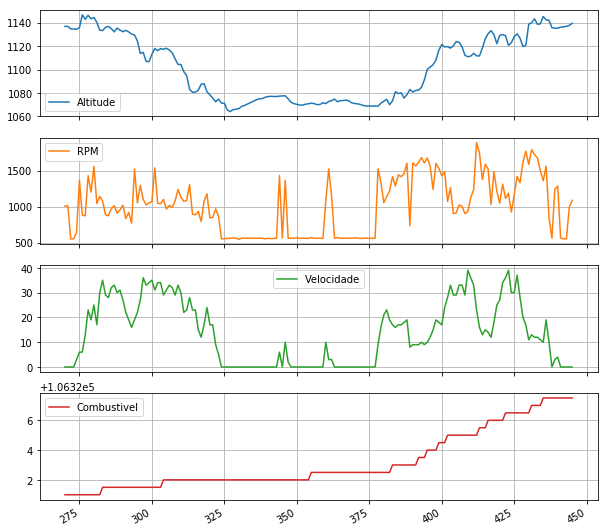

In [9]:
x.plot(subplots=True,figsize=(10,10),grid=True)
plt.savefig('test2png.png', dpi=500)

In [10]:
# O método lmplot() cria plot com dados e modelos de regressão.
#sns.lmplot("Altitude", "Velocidade", x, col = "Combustivel");

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

comb = dadosMina.loc[:,['Combustivel']]
date = dadosMina.loc[:,['Altitude','Velocidade','Acelerador']]


Altitude = dadosMina.loc[:,['Altitude']]



X_train, X_test, y_train, y_test = train_test_split(date, comb, test_size = 0.20)

In [12]:
from sklearn.neighbors import KNeighborsRegressor

In [13]:
neigh = KNeighborsRegressor(n_neighbors=10)
#neigh.fit(comb,date)
neigh.fit(date,comb)
KNeighborsRegressor(...)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=Ellipsis, p=2,
                    weights='uniform')

In [14]:
print(neigh.predict([[1100.14,    1.3 ,   13.6 ]]))

[[106797.15]]


In [15]:
rus = neigh.predict(comb)
rus
[1100.14,    1.3 ,   13.6 ]

ValueError: query data dimension must match training data dimension

In [ ]:
rus.plot(subplots=True,figsize=(10,10),grid=True)
#plt.savefig('test2png.png', dpi=500)